# Predicting Loan defaults from Lending Club data

In [4]:
#features used in this analysis are; 
# Home ownership, household income ($), debt to income ratio (dti) and credit score (fico)


In [36]:
#import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

In [7]:
#load data
lending_data = pd.read_excel("C:\\Users\\ofagb\\OneDrive\\Documents\\lendingclubdata.xlsx")

In [8]:
lending_data

,home_ownership,income,dti,fico,loan_status
0,1,44304.0,18.47,690,0
1,0,50000.0,29.62,735,1
2,0,64400.0,16.68,675,1
3,0,38500.0,33.73,660,0
4,1,118000.0,26.66,665,1
...,...,...,...,...,...
6995,1,180000.0,14.60,665,1
6996,1,32000.0,20.33,745,1
6997,1,80000.0,11.68,690,1
6998,0,37921.0,32.85,705,0


In [9]:
lending_data.corr() #checking correlation matrix for multicolinearity among features

,home_ownership,income,dti,fico,loan_status
home_ownership,1.000000,0.178067,-0.010908,0.121495,0.077422
income,0.178067,1.000000,-0.216369,0.093997,0.057636
dti,-0.010908,-0.216369,1.000000,-0.110281,-0.139207
fico,0.121495,0.093997,-0.110281,1.000000,0.137103
loan_status,0.077422,0.057636,-0.139207,0.137103,1.000000


In [29]:
lending_data.dtypes #checking data types

home_ownership      int64
income            float64
dti               float64
fico                int64
loan_status         int64
dtype: object

In [10]:
lending_data.isnull().sum()  #checking for null values in dataset

home_ownership    0
income            0
dti               0
fico              0
loan_status       0
dtype: int64

In [11]:
#Split Features (X variables) and Target (Y variable)
X = lending_data.drop(columns = 'loan_status', axis = 1)
Y = lending_data['loan_status']

In [12]:
X #new df containing only features

,home_ownership,income,dti,fico
0,1,44304.0,18.47,690
1,0,50000.0,29.62,735
2,0,64400.0,16.68,675
3,0,38500.0,33.73,660
4,1,118000.0,26.66,665
...,...,...,...,...
6995,1,180000.0,14.60,665
6996,1,32000.0,20.33,745
6997,1,80000.0,11.68,690
6998,0,37921.0,32.85,705


In [13]:
Y #new df containing only target

0       0
1       1
2       1
3       0
4       1
       ..
6995    1
6996    1
6997    1
6998    0
6999    1
Name: loan_status, Length: 7000, dtype: int64

In [15]:
#Feature scaling X
X = (X - X.mean()) / X.std()
X

,home_ownership,income,dti,fico
0,0.809651,-0.556232,0.053102,-0.163701
1,-1.234923,-0.451393,1.307386,1.262539
2,-1.234923,-0.186349,-0.148259,-0.639114
3,-1.234923,-0.663060,1.769728,-1.114527
4,0.809651,0.800204,0.974410,-0.956056
...,...,...,...,...
6995,0.809651,1.941365,-0.382242,-0.956056
6996,0.809651,-0.782698,0.262337,1.579481
6997,0.809651,0.100782,-0.710718,-0.163701
6998,-1.234923,-0.673717,1.670735,0.311713


In [16]:
#Splitting X in training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)

In [17]:
print(X.shape, X_train.shape, X_test.shape) #training data 80% (5600) and test data 20% (1400)

(7000, 4) (5600, 4) (1400, 4)


In [18]:
#Training model using logistic regression
model = LogisticRegression() 

In [19]:
model.fit(X_train, Y_train)

LogisticRegression()

In [31]:
#Model evaluation using Accuracy score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [32]:
print('Accuracy on training data:', round(training_data_accuracy*100,2), '%')

Accuracy on training data: 79.18 %


In [33]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [34]:
print('Accuracy on test data:', round(test_data_accuracy*100,2), '%')

Accuracy on test data: 79.14 %


In [39]:
#Confusion Matrix
cf_matrix = confusion_matrix(Y_test, X_test_prediction)
print(cf_matrix)

[[   0  292]
 [   0 1108]]


In [42]:
tn,fp,fn,tp = cf_matrix.ravel() #true positive (tp), false positive (fp),false negative (fn), true positive (tp)
print(tn,fp,fn,tp)

0 292 0 1108


<AxesSubplot:>

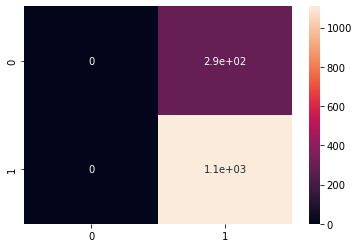

In [44]:
#Visualizing Confusion Matrix # Accuracy Score = (tp+tn)/ (tp+tn+fp+fn) or (1108+0)/(1108+0+292+0)
sns.heatmap(cf_matrix, annot = True)

In [45]:
#Use model for predictions
data = (1,125000,32.63, 685) #copy features of any observation from the dataset excluding target
data_numpy_array = np.asarray(data) #converting data to numpy array

In [46]:
data_reshaped = data_numpy_array.reshape(1,-1)

In [47]:
prediction = model.predict(data_reshaped)
print(prediction) #correct prediciton as target for observation =1

[1]


C:\Users\ofagb\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
